## ***NAME- SHIVAM JHA***
## ***REFF- SIRSS2317***
## ***COLLEGE- MAHARAJA SURAJMAL INSTITUTE OF TECHNOLOGY***
## ***TEAM PROJECT- STOCK MARKET PREDICTION***
## ***TEAM 19***

In [5]:
import os 
import pydrive  
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets,layers,models,Model

In [6]:
path="/content/MSFT.csv"
df=pd.read_csv(path)

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [8]:

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8852,2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
8853,2021-04-28,256.079987,256.540009,252.949997,254.559998,254.559998,46903100
8854,2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000
8855,2021-04-30,249.740005,253.080002,249.600006,252.179993,252.179993,30929200
8856,2021-05-03,253.399994,254.350006,251.119995,251.860001,251.860001,19598900


In [9]:
df1=df.reset_index()['Close']

In [10]:
df1


0         0.097222
1         0.100694
2         0.102431
3         0.099826
4         0.098090
           ...    
8852    261.970001
8853    254.559998
8854    252.509995
8855    252.179993
8856    251.860001
Name: Close, Length: 8857, dtype: float64

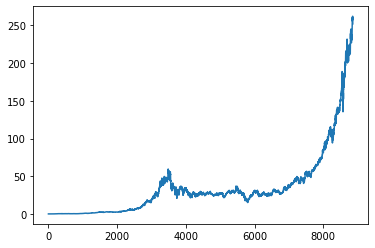

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [12]:
df1

0         0.097222
1         0.100694
2         0.102431
3         0.099826
4         0.098090
           ...    
8852    261.970001
8853    254.559998
8854    252.509995
8855    252.179993
8856    251.860001
Name: Close, Length: 8857, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[2.65159923e-05]
 [3.97739884e-05]
 [4.64067989e-05]
 ...
 [9.63876521e-01]
 [9.62616393e-01]
 [9.61394489e-01]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(5757, 3100)

In [17]:
train_data

array([[2.65159923e-05],
       [3.97739884e-05],
       [4.64067989e-05],
       ...,
       [7.80118529e-02],
       [7.89283033e-02],
       [7.41551197e-02]])

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:

print(X_train.shape), print(y_train.shape)

(5656, 100)
(5656,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(2999, 100)
(2999,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
89/89 [==============================] - 17s 152ms/step - loss: 3.0285e-04 - val_loss: 0.0012
Epoch 2/100
89/89 [==============================] - 12s 137ms/step - loss: 3.2276e-05 - val_loss: 0.0022
Epoch 3/100
89/89 [==============================] - 12s 135ms/step - loss: 3.0501e-05 - val_loss: 0.0021
Epoch 4/100
89/89 [==============================] - 13s 141ms/step - loss: 2.5374e-05 - val_loss: 0.0021
Epoch 5/100
89/89 [==============================] - 12s 139ms/step - loss: 2.2682e-05 - val_loss: 0.0020
Epoch 6/100
89/89 [==============================] - 12s 138ms/step - loss: 2.1736e-05 - val_loss: 0.0020
Epoch 7/100
89/89 [==============================] - 12s 137ms/step - loss: 2.1599e-05 - val_loss: 0.0021
Epoch 8/100
89/89 [==============================] - 12s 136ms/step - loss: 1.8069e-05 - val_loss: 0.0011
Epoch 9/100
89/89 [==============================] - 12s 136ms/step - loss: 1.8305e-05 - val_loss: 8.1648e-04
Epoch 10/100
89/89 [======================

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.627650534428838

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

87.57439554116466

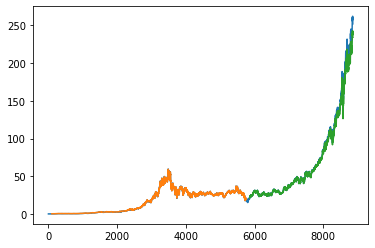

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

3100

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 2759)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.10886571144633439,
 0.10749103223893476,
 0.10317607746936397,
 0.10214506806381428,
 0.09996849750763166,
 0.09920478521834294,
 0.0951571275650332,
 0.09893748810208194,
 0.09817377581279325,
 0.09851744561464315,
 0.10069401617082575,
 0.10222144074940316,
 0.09813559675329896,
 0.09622632331337734,
 0.09553898370967752,
 0.09431704987345572,
 0.09511894122223873,
 0.09763918158027124,
 0.09702821466216034,
 0.101152245001059,
 0.10015942193830375,
 0.10035035365227601,
 0.100617650768537,
 0.09874656367140984,
 0.09805922406771005,
 0.0963026887156661,
 0.09511894122223873,
 0.09332422681070049,
 0.09248414183582286,
 0.08866559495597964,
 0.08752003380534673,
 0.08809281438066317,
 0.08851285686810198,
 0.09061305473869569,
 0.0924459554930284,
 0.09286599798046721,
 0.09233140374794521,
 0.09446978796133336,
 0.09561534911196627,
 0.09679910388869378,
 0.0970664010049548,
 0.09469889873479993,
 0.09599720525661062,
 0.09695184197657143,
 0.09557717005247199,
 0.098326521183971

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
len(df1)

8857

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=2758
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.10749103 0.10317608 0.10214507 ... 0.96387652 0.96261639 0.96139449]
0 day output [[0.8925683]]
1 day input [0.10317608 0.10214507 0.0999685  ... 0.96261639 0.96139449 0.89256829]
1 day output [[0.81425536]]
2 day input [0.10214507 0.0999685  0.09920479 ... 0.96139449 0.89256829 0.81425536]
2 day output [[0.74618614]]
3 day input [0.0999685  0.09920479 0.09515713 ... 0.89256829 0.81425536 0.74618614]
3 day output [[0.6921802]]
4 day input [0.09920479 0.09515713 0.09893749 ... 0.81425536 0.74618614 0.69218022]
4 day output [[0.64994645]]
5 day input [0.09515713 0.09893749 0.09817378 ... 0.74618614 0.69218022 0.64994645]
5 day output [[0.61517185]]
6 day input [0.09893749 0.09817378 0.09851745 ... 0.69218022 0.64994645 0.61517185]
6 day output [[0.58440495]]
7 day input [0.09817378 0.09851745 0.10069402 ... 0.64994645 0.61517185 0.58440495]
7 day output [[0.55576646]]
8 day input [0.09851745 0.10069402 0.10222144 ... 0.61517185 0.58440495 0.55576646]
8 day output [[0.52860

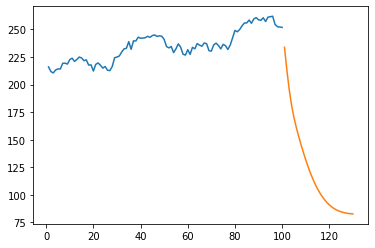

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[8757:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

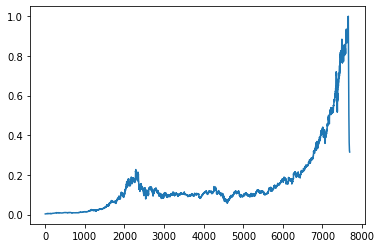

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

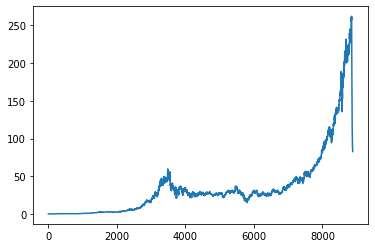

In [50]:
plt.plot(df3)

In [ ]:
test_predict1=model.predict(X_test)
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(ytest,test_predict1))